## Pergunta 1

Por que o centroide que obtivemos com o ajuste das gaussianas é mais estável do que o centro de massa, frente a uma alteração no intervalo amostrado?

*Proposta de teste:* Tenta calcular o centro de massa de uma gaussiana gerada artificialmente.
Depois move um dos pontos dessa gaussiana artificial para uma coordenada $y$ bem diferente, e tenta calcular novamente o centro de massa, e também ajustar uma gaussiana.
Qual dos dois (centro de massa ou gaussiana ajustada) é mais influenciado pela alteração de um ponto?

## Resposta
Pois ajustando uma curva e as constantes com o `curve_fit` a partir da `gaussian2` eliminamos o ruido e retornamos um modelo mais liso dos dados experimentais 

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.style.use('seaborn-bright')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['lines.linewidth'] = 2



## Exercício 1

Repita esse exercício para encontrar a outra coordenada do centro da galáxia, ou seja, a coordenada das colunas (ou coordenada $x$, ou horizontal).

In [2]:
image = fits.getdata('Imagens de galaxia/frame-z-006793-1-0130.fits.bz2')
def gaussian2(x, a, b, x0, sigma_a, sigma_b):
    g1 = a * np.exp(-(x - x0)**2 / 2.0 / sigma_a**2)
    g2 = b * np.exp(-(x - x0)**2 / 2.0 / sigma_b**2)
    g = g1 + g2
    return g
p, covariance = curve_fit(gaussian2, xdata=np.arange(1400, 1600), ydata=image[984-10:984+10, 1400:1600].mean(axis=0), p0=[10.0, 10.0, 1510, 10.0, 10.0]) 

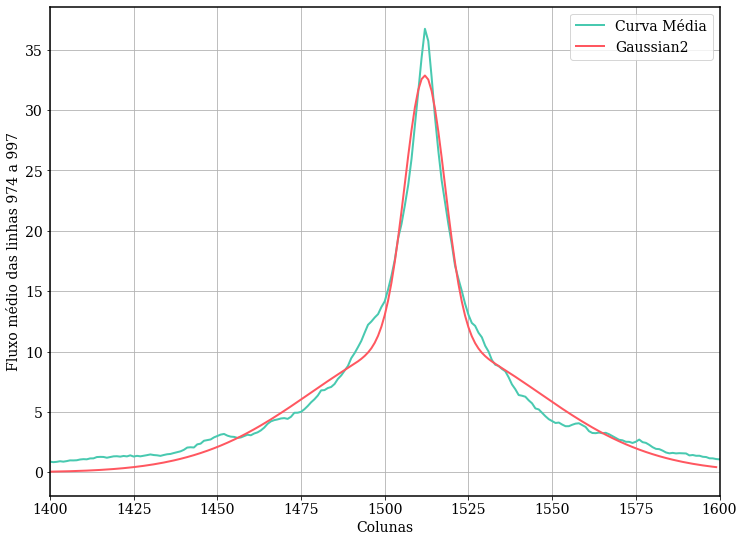

In [3]:
plt.plot(image[984-10:984+10, :].mean(axis=0), label='Curva Média', color='#48C9B0')
plt.plot(np.arange(1400, 1600),gaussian2(np.arange(1400, 1600),*p), label='Gaussian2', color='#FF5760')
plt.xlabel('Colunas')
plt.ylabel('Fluxo médio das linhas 974 a 997')
plt.xlim(1500-100,1500+100)
plt.grid()
plt.legend()
plt.show()

In [4]:
for i, j in zip("A B x0 sigma_a sigma_b".split(), p): 
    print(f"{i} = {j:.2f}")

A = 22.06
B = 10.81
x0 = 1511.97
sigma_a = 5.92
sigma_b = 34.23


## Exercício 2

A-)Repete o procedimento para as imagens nos outros filtros, encontrando o centroide em cada uma delas.

B-)Depois, mede o fluxo em uma abertura circular de 1.5 segundos de arco de raio, centrada nas coordenadas que tu encontraste em cada uma das imagens. 
Utiliza a seguinte conversão entre pixeis e segundos de arco.

In [5]:
from astropy import wcs
w = wcs.WCS('Imagens de galaxia/frame-z-006793-1-0130.fits.bz2')
proj = wcs.utils.proj_plane_pixel_scales(w)
print(f"Escala de pixel: {proj.mean() * 3600.0:.3f} segundos de arco por pixel")

Escala de pixel: 0.396 segundos de arco por pixel


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


## A-) Centroide em cada Filtro: 

In [6]:
filtros = 'u,g,r,i,z'
data_fits = np.array([fits.getdata(f'Imagens de galaxia/frame-{_}-006793-1-0130.fits.bz2') for _ in filtros.split(',')]) 
data_wcs = np.array([wcs.WCS(f'Imagens de galaxia/frame-{_}-006793-1-0130.fits.bz2') for _ in filtros.split(',')]) 


In [7]:
## Vetores que contém as coordenadas do ponto central da galaxia x0 e y0##
x0_All = np.array([curve_fit(gaussian2, 
                   xdata=np.arange(1300, 1600), 
                   ydata=_[984-10:984+10, 1300:1600].mean(axis=0), 
                   p0=[34.0, 37.0, 1510, 10.0, 10.0])[0][2] 
                   for _ in data_fits])

y0_All = np.array([curve_fit(gaussian2, 
                   xdata=np.arange(920, 1100), 
                   ydata=_[920:1100, 1510-10:1510+10].mean(axis=1), 
                   p0=[10.0, 10.0, 985.0, 10.0, 10.0])[0][2] 
                   for _ in data_fits])

## -------------------------------------------------------------------- ##
                    ## Coordenadas Arredondada ##
    
Coord = { _:[i,j] for i,j,_ in zip(np.round(x0_All,3), np.round(y0_All,3),filtros.split(','))}
print('Filtro \t|  x0 \t\t| y0 ')
print('-------------------------------')
for key, value in Coord.items():
    print(f'{key} \t|  {value[0]} \t| {value[1]}')

Filtro 	|  x0 		| y0 
-------------------------------
u 	|  1523.804 	| 992.326
g 	|  1517.316 	| 996.902
r 	|  1522.604 	| 976.234
i 	|  1511.99 	| 979.821
z 	|  1511.972 	| 984.516



## B-) Fluxo para Abertura circular:


[1.3710938  1.3378906  1.2949219  0.9609375  1.2832031  1.1601562
 1.0820312  1.1054688  1.0488281  1.0058594  1.5039062  1.2382812
 1.2148438  1.0390625  0.9716797  0.9941406  0.8935547  1.3378906
 1.5371094  1.1933594  0.82714844 0.94921875 0.7607422  0.8720703
 1.1152344  1.1601562  1.1386719  1.0273438  0.7832031  0.89453125
 0.6611328  1.1054688  1.0605469  0.95996094 1.0058594  0.86035156
 0.90527344 0.7050781  0.93847656 1.171875   0.73828125 0.9609375
 0.81640625 1.0722656  0.8496094 ]


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

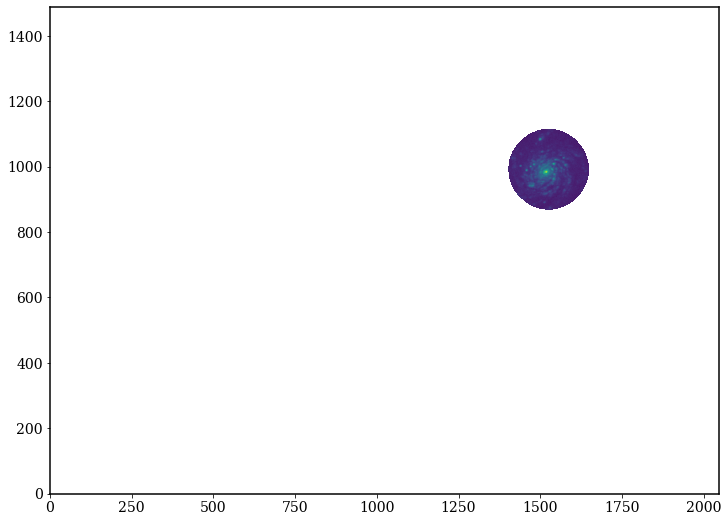

In [8]:
y,x = np.indices(data_fits[0].shape)*0.396 ##Arcsec
x0,y0 = 1523.804*0.396,  992.326*0.396
r = np.sqrt((x - x0)**2 + (y - y0)**2)
copia = data_fits[0]
copia[r>50]=np.nan
plt.imshow(copia, origin='lower')
print(copia[r<1.5])

data_fits[0]

## Desafio 0

Escreve uma função que retorne as coordenadas do centroide da galáxia (ou de qualquer outro objeto bem representado por duas gaussianas) que tome como entrada apenas os seguintes parâmetros obrigatórios:
- o nome do arquivo FITS que contém a imagem
- um palpite inicial para a posição do centroide
- uma largura para a região que deve ser investigada

Inclui parâmetros opcionais a teu critério.

In [10]:
def coord_of_galaxy(x0, y0, data, width, crop_x1=0, crop_x2=0, crop_y1=0, crop_y2=0):
    def gaussian2(x, a, b, x0, sigma_a, sigma_b):
        g1 = a * np.exp(-(x - x0)**2 / 2.0 / sigma_a**2)
        g2 = b * np.exp(-(x - x0)**2 / 2.0 / sigma_b**2)
        g = g1 + g2
        return g
    if ((crop_x1+crop_x2+crop_y1+crop_y2) == 0):
        x0_ = curve_fit(gaussian2, xdata=np.arange(data.shape[1]), ydata=data[y0-width:y0+width, :].mean(axis=0), p0=[10.0, 10.0, x0, 10.0, 10.0])[0][2]
        y0_ = curve_fit(gaussian2, xdata=np.arange(data.shape[0]), ydata=data[:, x0-width:x0+width].mean(axis=1), p0=[10.0, 10.0, y0, 10.0, 10.0])[0][2]
    else:
        x0_ = curve_fit(gaussian2, xdata=np.arange(crop_x1,crop_x2), ydata=data[y0-width:y0+width, crop_x1:crop_x2].mean(axis=0), p0=[10.0, 10.0, x0, 10.0, 10.0])[0][2]
        y0_ = curve_fit(gaussian2, xdata=np.arange(crop_y1,crop_y2), ydata=data[crop_y1:crop_y2, x0-width:x0+width].mean(axis=1), p0=[10.0, 10.0, y0, 10.0, 10.0])[0][2]
    return [x0_, y0_]

In [11]:
coord_u = coord_of_galaxy(1510,980,data_fits[4],10,1300,1600,920,1100)
print(coord_u)

[1511.7501750472688, 984.5160836143415]


## Desafio 1

Tenta escrever uma função que retorne uma Gaussiana circular bi-dimensional.

$$ f(x, y) = A \exp \left\{ - \frac{(x - x_0)^2}{2\sigma^2} - \frac{(y - y_0)^2}{2\sigma^2}\right\} $$

Depois, tenta fazer o ajuste dessa função bi-dimensional diretamente na imagem, sem fazer o corte em linhas e colunas, mas podendo fazer um corte retangular.

*Dica: a função `curve_fit` precisa de uma saída unidimensional das funções que ela tenta ajustar, portanto será necessário utilizar algo como o `numpy.ravel` para transformar o resultado 2D da função em um array de apenas uma dimensão.
O mesmo procedimento deverá ser feito com a imagem antes do ajuste.* 

In [201]:
def gaussian_circ(A, x, y, x0, y0, sigma):
    p1 = (-(x - x0)**2)/(2*sigma**2)
    p2 = (-(y - y0)**2)/(2*sigma**2)
    return A*np.exp(p1+p2)
x = np.arange(-3,3,0.01)
y = np.arange(-3,3,0.01)
X,Y = np.meshgrid(x,y)

Gau = gaussian_circ(10,X,Y,0,0,0.8)

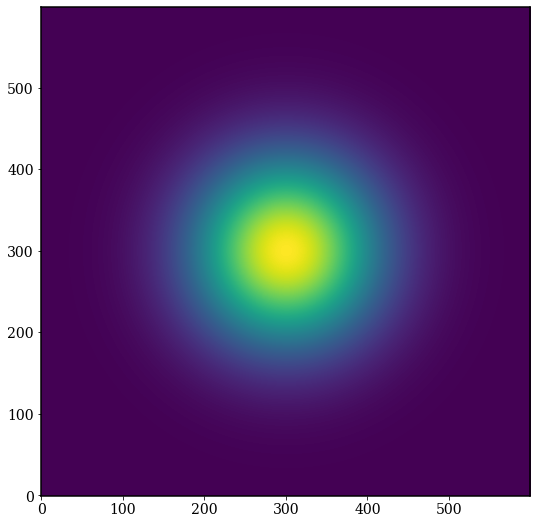

In [202]:
plt.imshow(Gau,origin='lower')

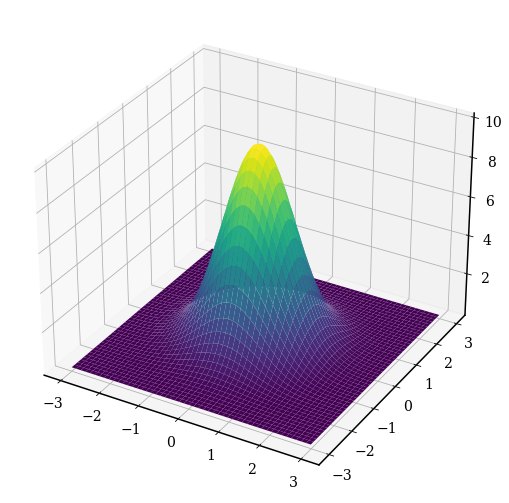

In [203]:
fig= plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Gau, cmap='viridis');